In [626]:
import pandas as pd
import  numpy  as  np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from pandas_ml import ConfusionMatrix
from scipy.fftpack import fft
from geopandas import GeoDataFrame
import geopandas
from shapely.geometry import Point
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [627]:
raw_data_file_name= "Data_to_Clustered/dilum_sir_route_without_duplications.json"
raw_data = pd.read_json(raw_data_file_name)
raw_data.head(5)

,anomaly,lat,lon
0,A,6.758759,79.948375
1,A,6.757569,79.952875
2,A,6.752263,79.955845
3,A,6.751405,79.954408
4,A,6.749772,79.953156


In [628]:
raw_data.shape

(284, 3)

In [629]:
#features = ['lat','lon',]
#coordinates = raw_data[features]
#coordinates.head()

In [630]:
#coordinates.shape

In [631]:
#coordinates['coordinates'] = list(zip(coordinates.lon, coordinates.lat))

In [632]:
#coordinates.head()

In [633]:
#coordinates['coordinates'] = coordinates['coordinates'].apply(Point)

In [634]:
#coordinates.head()

In [635]:
#gdf = GeoDataFrame(coordinates, geometry='coordinates')
#gdf.plot()

In [636]:
#print(gdf.head())

In [637]:
#world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
#ax = world[world.continent == 'Asia'].plot(
    #color='white', edgecolor='black')

# We can now plot our GeoDataFrame.
#gdf.plot(ax=ax, color='red')

#plt.show()

In [638]:
#gdf.plot()

In [639]:
#kms_per_radian = 6371.0088
#epsilon = 0.01 / kms_per_radian
#print(epsilon)

In [640]:
kms_per_radian = 6371.0088
epsilon = 0.005 / kms_per_radian
coords = raw_data.as_matrix(columns=['lat', 'lon'])
#print(coords)

In [641]:
db = DBSCAN(eps = epsilon, min_samples=2, algorithm='ball_tree',metric='haversine').fit(np.radians(coords))

In [642]:
cluster_labels = db.labels_
n_clusters = len(set(cluster_labels))

In [643]:
cluster_labels 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45,  0,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       46, 47, -1, -1, 24, -1, 48, 27, -1, 49, 31, 31, -1, 50, -1, -1, -1,
       51, -1, 42, -1, 52, -1, -1, -1, -1, 11, -1, -1, -1, 53, 53, -1, 27,
       -1, -1, 31, 32, -1, -1, 51, -1, -1, -1, -1, 44, -1, -1, -1, -1, 24,
       -1, -1, 48, -1, -1, -1, 50, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       52, -1, -1, -1, -1, -1, -1, 54, -1, -1, -1, -1, -1, -1, 14, 15, -1,
       55, -1, 46, -1, -1, -1, 47, -1, -1, 53, 56, -1, 57, -1, -1, -1, 24,
       -1, -1, -1, 58, -1, -1, -1, 31, 31, 50, 50, -1, 59, -1, -1, -1, 51,
       41, -1, -1, -1, -1

In [644]:
db

DBSCAN(algorithm='ball_tree', eps=7.848050688613082e-07, leaf_size=30,
    metric='haversine', metric_params=None, min_samples=2, n_jobs=1,
    p=None)

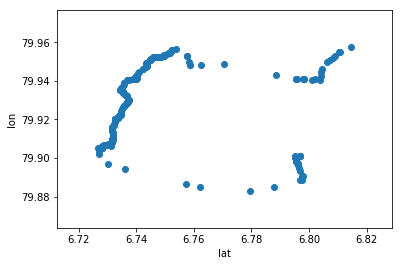

In [645]:
x = raw_data['lat']
y = raw_data['lon']

plt.scatter(x,y)
plt.xlabel("lat")
plt.ylabel("lon")
plt.show()

In [646]:
db.core_sample_indices_

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92, 102, 103, 106, 108, 109, 111, 112, 113, 115, 119, 121,
       123, 128, 132, 133, 135, 138, 139, 142, 147, 152, 155, 159, 170,
       177, 184, 185, 187, 189, 193, 196, 197, 199, 203, 207, 211, 212,
       213, 214, 216, 220, 221, 242, 244, 247, 248, 256, 258, 259, 265,
       266, 268, 270, 271, 272, 274], dtype=int64)

In [647]:
result = raw_data
result['cluster'] = db.labels_
result = result.iloc[db.core_sample_indices_]
result.head()

,anomaly,lat,lon,cluster
0,A,6.758759,79.948375,0
1,A,6.757569,79.952875,1
2,A,6.752263,79.955845,2
3,A,6.751405,79.954408,3
4,A,6.749772,79.953156,4


In [648]:
result.shape

(149, 4)

In [649]:
result['cluster'].describe()

count    149.000000
mean      29.852349
std       16.671863
min        0.000000
25%       16.000000
50%       31.000000
75%       44.000000
max       59.000000
Name: cluster, dtype: float64

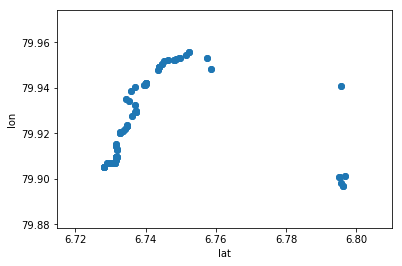

In [650]:
x = result['lat']
y = result['lon']
c = result['cluster']

#plt.scatter(x,y,c)
plt.scatter(x,y,label=c)
plt.xlabel("lat")
plt.ylabel("lon")
plt.show()

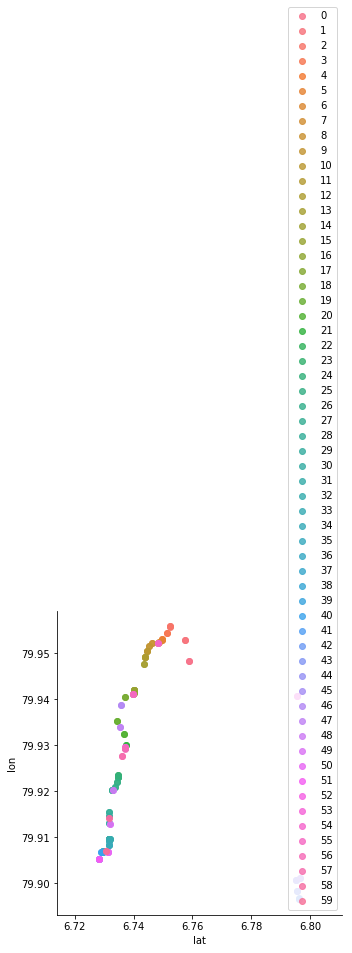

In [651]:
import seaborn as sns
#df = sns.load_dataset('iris')
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="lat", y="lon", data=result, fit_reg=False, hue='cluster', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')


In [652]:
result.to_json("Clustered_Data/dilum_sir_route_without_duplications_radius_5_samplesize_2.json", orient='records')